### Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [1]:
import pandas as pd

# 데이터 세트 호출
drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Ⅰ. 데이터 분석

#### 📊 데이터 정보

In [2]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Ⅱ. 데이터 전처리

#### 📊 데이터 결측치 확인

In [3]:
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### 📊 데이터 이상치 제거

In [4]:
# 특정 피처만 가져와 새로운 데이터 프레임으로 생성
na_to_k_df = drug_df.loc[:, 'Na_to_K'].reset_index()
na_to_k_df

# Tip
# 신규 데이터 프레임에서 정규화 진행 후 이상치를 구분하고
# 원본 데이터에서 이상치를 인덱스 번호로 제거하기 때문에 인덱스 번호 유지

,index,Na_to_K
0,0,25.355
1,1,13.093
2,2,10.114
3,3,7.798
4,4,18.043
...,...,...
195,195,11.567
196,196,12.006
197,197,9.894
198,198,14.020


In [5]:
from sklearn.preprocessing import StandardScaler

# 평균이 0, 분산이 1이되도록 표준편차를 따르게 하는 스케일링 매소드 담기
std = StandardScaler()
# 특정 피처 데이터의 정규화
std_na_to_k = std.fit_transform(na_to_k_df[['Na_to_K']])
std_na_to_k

array([[ 1.28652212],
       [-0.4151454 ],
       [-0.82855818],
       [-1.14996267],
       [ 0.27179427],
       [-1.03769314],
       [ 0.02643885],
       [-0.70046821],
       [-0.12676951],
       [ 0.45567206],
       [-0.59916196],
       [ 0.43221897],
       [-0.09832049],
       [ 0.674105  ],
       [-0.46926791],
       [-0.0788919 ],
       [-0.64245998],
       [-0.29316156],
       [-1.21935052],
       [ 1.37242427],
       [ 0.42236589],
       [ 1.36451406],
       [ 2.00995979],
       [-0.14550423],
       [ 2.41490725],
       [ 0.37809645],
       [ 1.9819271 ],
       [-0.93028076],
       [ 0.91765633],
       [ 0.25902691],
       [-1.01784822],
       [-0.90446848],
       [-0.70366006],
       [ 2.19147839],
       [-0.27081868],
       [-1.2211546 ],
       [-0.92139911],
       [-0.29787994],
       [-0.88476233],
       [-0.97149714],
       [ 0.43527203],
       [-0.25610845],
       [-0.04086736],
       [-0.53074555],
       [-0.5258884 ],
       [-1

In [6]:
# 정규화된 데이터 값으로 대체
na_to_k_df['Na_to_K'] = std_na_to_k
na_to_k_df

,index,Na_to_K
0,0,1.286522
1,1,-0.415145
2,2,-0.828558
3,3,-1.149963
4,4,0.271794
...,...,...
195,195,-0.626917
196,196,-0.565995
197,197,-0.859089
198,198,-0.286500


In [7]:
# 정상 데이터 범위 지정
cond1 = na_to_k_df['Na_to_K'] >= -1.96
cond2 = na_to_k_df['Na_to_K'] <= 1.96
cond = cond1 & cond2

# 정상 데이터의 인덱스 번호를 가져와 원본 데이터와 대조하기 (이상치 제거)
drug_df = drug_df.iloc[na_to_k_df[cond].index].reset_index(drop=True)
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
183,56,F,LOW,HIGH,11.567,drugC
184,16,M,LOW,HIGH,12.006,drugC
185,52,M,NORMAL,HIGH,9.894,drugX
186,23,M,NORMAL,NORMAL,14.020,drugX


#### 📊 문자열/범주형 데이터 정수 형변환

In [8]:
drug_enc_df = drug_df.copy()

In [9]:
from sklearn.preprocessing import LabelEncoder

# 문자열/범주형 데이터를 정수로 변환하는 매소드 가져오기
drug_encoder = LabelEncoder()
# 특정 피처 리스트로 가져와 데이터 형변환하기(모델은 학습 됨)
# 파이썬 리스트로 전달해야 함
targets = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = targets

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(drug_df['Sex'].tolist())
drug_enc_df['Sex'] = genders

blood_pressure_encoder = LabelEncoder()
blood_pressures = blood_pressure_encoder.fit_transform(drug_df['BP'].tolist())
drug_enc_df['BP'] = blood_pressures

cholesterol_encoder = LabelEncoder()
cholesterols = cholesterol_encoder.fit_transform(drug_df['Cholesterol'].tolist())
drug_enc_df['Cholesterol'] = cholesterols

In [10]:
# 학습된 모델의 클래스 확인 (원래 값의 배열 제공)
drug_encoder.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype='<U5')

In [13]:
# 정수로 인코딩된 데이를 원래의 데이터 값으로 다시 형변환
drug_encoder.inverse_transform(drug_enc_df['Drug'])

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugB', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugA', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugB', 'drugY', 'drugA', 'drugX',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugA', 'drugX', 'drugB', 'drugX',
       'drugC', 'drugA', 'drugC', 'drugB', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugC', 'drugX', 'drugY',
       'drugX', 'dru

### Ⅲ. 데이터 세트 분리

#### 📊 데이터 세트 분리

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 분류 모델 가져오기
dtc = DecisionTreeClassifier()

# 피처와 컬럼으로 분리
features, targets = drug_enc_df.iloc[:, :-1], drug_enc_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터로 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

### Ⅳ. 데이터 학습

#### 📊 데이터 학습

In [16]:
# 데이터 학습
dtc.fit(X_train.values, y_train.values)

# Tip
# Scikit-learn의 모델들은 일반적으로 Numpy 배열을 입력 받음
# DecisionTreeClassifier 모델이 Numpy 배열 형태의 입력을 필요로 하기 때문에 values로 받은 것

DecisionTreeClassifier()

#### 📊 의사결정 트리

In [17]:
from sklearn.tree import export_graphviz

# 의사결정트리 매소드를 통해 dot 포맷으로 변환
export_graphviz(
    dtc, 
    out_file='./images/drug_dtc01.dot', 
    class_names=drug_encoder.classes_, 
    feature_names=features.columns, 
    impurity=True, 
    filled=True
)

In [18]:
import graphviz

# with문으로 파일을 열거나 또는 다른 리소스 사용(사용 후 닫음)
# 해당 경로에 있는 dot파일을 열고 f에 담기
with open('./images/drug_dtc01.dot') as f:
    drug_dtc01 = f.read()
    
# 파일의 내용을 그래프 객체로 변환
drug_dtc01_graph = graphviz.Source(drug_dtc01)

In [19]:
# 그래프 객체 이미지 파일로 랜더링
drug_dtc01_graph.render(filename='drug_dtc01', directory='./images', format='png')

'images\\drug_dtc01.png'

<img src="./images/drug_dtc01.png">

#### 📊 Feature 별 중요도

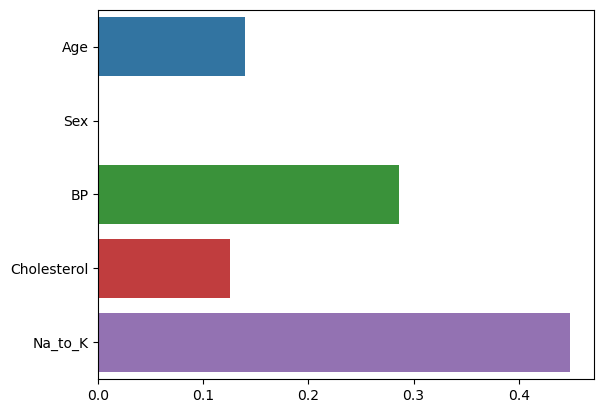

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처별 중요도(feature_importances_) 바 그래프로 그리기
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

#### 📊 피처 및 타겟 관계 탐색

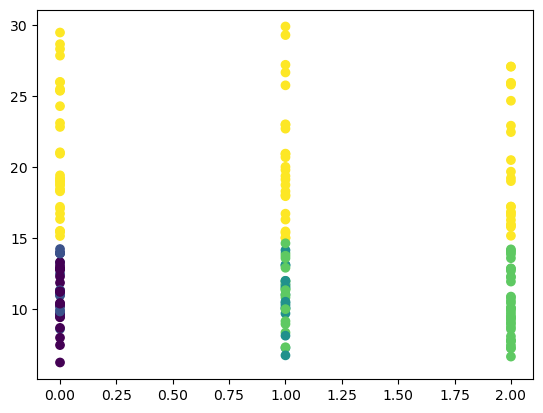

In [21]:
# BP와 Na_to_K 피처의 관계를 산점도로 나타내기
plt.scatter(features.iloc[:, 2], features.iloc[:, -1], c=targets)

In [22]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [23]:
# BP와 Na_to_K 피처 가져오기
features_2_4 = features.iloc[:, [2, 4]]

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


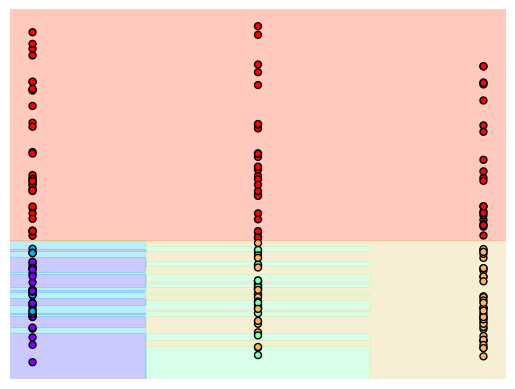

In [24]:
# BP, Na_to_K 피처와 타겟 관계를 산점도로 나타내기
visualize_boundary(dtc, features_2_4, targets)

### Ⅴ. 조정

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [26]:
# 데이터 분류 모델 가져오기
# 데이터 overfitting(과적합) 방지를 위해 최소 샘플 개수 지정
dtc = DecisionTreeClassifier(min_samples_leaf=16)

In [27]:
# 피처, 타겟 데이터 분리
features, targets = drug_enc_df.iloc[:, :-1], drug_enc_df.iloc[:, -1]

# 문제/정답, 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [28]:
# 데이터 학습
dtc.fit(X_train.values, y_train.values)

DecisionTreeClassifier(min_samples_leaf=16)

#### 📊 피처 및 타겟 관계 탐색

In [29]:
# BP와 Na_to_K 피처 가져오기
features_2_4 = features.iloc[:, [2, 4]]

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


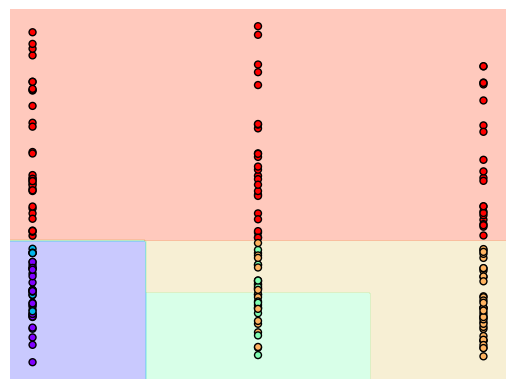

In [30]:
# BP, Na_to_K 피처와 타겟 관계를 산점도로 나타내기
visualize_boundary(dtc, features_2_4, targets)

### Ⅵ. 데이터 2차 전처리 및 데이터 세트 분리

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### 📊 데이터 2차 전처리

In [32]:
# 분류 모델 가져오기
dtc = DecisionTreeClassifier(min_samples_leaf=16)

#### 📊 데이터 세트 분리

In [33]:
# 피처와 컬럼으로 분리
features, targets = drug_enc_df.iloc[:, :-1], drug_enc_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터로 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

### Ⅶ. 데이터 2차 학습

#### 📊 데이터 학습

In [34]:
# 데이터 학습
dtc.fit(X_train.values, y_train.values)

DecisionTreeClassifier(min_samples_leaf=16)

### Ⅷ. 데이터 예측

#### 📊 데이터 예측

In [35]:
# 데이터에 대한 값을 예측
dtc.predict(X_test.values)

array([4, 4, 1, 4, 3, 2, 4, 0, 2, 4, 2, 1, 4, 3, 4, 4, 4, 3, 4, 1, 3, 1,
       4, 0, 4, 2, 1, 4, 3, 2, 4, 3, 4, 2, 2, 4, 3, 3], dtype=int64)

### Ⅸ. 데이터 평가

#### 📊 데이터 평가

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
# 정답_테스트와 문제_테스트로 정확도 평가
accuracy_score(y_test, dtc.predict(X_test.values))

0.8421052631578947